# Numerical simulation final assignment
---------
Gravity model of international trade  
by Léanne Gelderblom - 384716, Dennis Stassen - 906208, 12th of April 2016

### Question
How much of the bilateral trade between the US and its partner countries can be explained by the simple gravity model of international trade? [Answer](#Answer)

### Motivation
Recently there has been a vived discussion in the Netherlands on the [TTIP treaty](http://ec.europa.eu/trade/policy/in-focus/ttip/) with the US. However, the effectiveness of this policy can be debated. With this notebook we attempt to provide a baseline level of how much of the trade flows of the United States of America can be explained solely by the size and distance between two countries. The estimated coefficient of R-squared provides insights in the importance of trade agreement or others policies too boost or diminish international trade. For policy recommendations we kindly refer to the [conclusion](#Conclusion). 

### Method 

#### The gravity model 
The figure below gives a graphical representation of the simple gravity model that finds its origin in physics. 
<img src="http://lewishistoricalsociety.com/wiki2011/article_image.php?image_type=article&id=87" width="400">
However, the economic relevance is intuitively clear as well. It is expected that countries who are closer to eachother trade more due to lower transportation costs or less cultural differences for example. The size of the countries is also an important feature as countries with a larger GDP naturally are expected to have a larger absolute value of tradeflow.

We have been able to find data provided by Maarten de Ridder for the instruction of datasets for bachelor theses. We will exploit this dataset to estimate the gravity model of international trade for the United States. The gravity model is presented as:

$$Exports_{i,j}=\beta * \frac{GDP_i * GDP_j}{Distance_j}$$

By changing the equation above to a linear form and taking logarithms, we are able to disentagle the effect of size and distance on exports. This leads to the following regression equation:

\begin{equation}
ln(Exports_{i,j})=\beta_0 + \beta_1 * ln(GDP_i) + \beta_2 * ln(GDP_j) - \beta_3 * ln(Distance_{i,j}) + \epsilon_{i,j}
\end{equation}

where 
*Exports* denotes the size of export stream from country i to country j. *GDP* is the Gross Domestic Product of country i and j respectively. Lastly, *distance* gives the distance in kilometers between both countries. We are interested in the sign and size of $\beta_1$, $\beta_2$ and $\beta_3$, but more specifically in the value of R-squared as this shows to what extend the variation in exports can be explained solely by the gravity model.

[Santos Silva and Tenreyro (2006)](http://personal.lse.ac.uk/tenreyro/jensen08k.pdf) state that the log-linear approach has two major problems:
    1. It cannot be used for observations where export is zero. Hence, these observations are dropped;
    2. It is argued that estimating the log-linearlzed equation by OLS can lead to significant biases.  
In spite of these issues, the simple OLS regression provides strong insights that are easily interpreted. Hence, this research provides a benchmark estimate and more extensive models are beyond the scope of this reseach. For more extensive models see LINK PAPERS.

### Answer
We find that the gravity model does well in explaining trade flows between the US and its partner countries. All coeffiencts except the regression coefficient of GDP of the US are statistically and economically [significant](#Regression). However, the model as a whole is jointly significant according to the F-test. Our specification does surprisingly well in explaining exports as the value of R-squared is 0.772 and remains high after [clustering errors](#Robustness). 

### Main assumptions
The frictionless gravity model assumes that:
- demand at each destination for goods from all origins
- market clearance
- perfect arbitrage with no trade costs

### Data
The dataset comprises of data from:
- Specific sources: IMF (world economic outlook; GDP (p.c.), money, inflation, public finances, trade), World Bank
(similar, with data on poverty), OECD (for OECD countries, more detailed statistics), Eurostat (Europe only, data on
labor markets, growth, industrial production, etc), Bankscope (financial industries)
- General source: Datastream (contains all datasets above). 

The time period in the dataset includes the years 1995, 2000, 2005, 2008 and 2009.



Importing all add-ins and data:

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("complete_data.csv", error_bad_lines=False)


Skipping line 97: expected 11 fields, saw 15
Skipping line 98: expected 11 fields, saw 15
Skipping line 99: expected 11 fields, saw 15
Skipping line 100: expected 11 fields, saw 15
Skipping line 101: expected 11 fields, saw 15



In [5]:
data

,country,partner,year,key1,key2,key3,key4,export,gdp_c,gdp_p,distance
0,United States,Argentina,1995,United StatesArgentina,United StatesArgentina1995,United States1995,Argentina1995,5860.1,7338400,258217.00,8542.694
1,United States,Argentina,2000,United StatesArgentina,United StatesArgentina2000,United States2000,Argentina2000,7231.6,9898800,284410.00,8542.694
2,United States,Argentina,2005,United StatesArgentina,United StatesArgentina2005,United States2005,Argentina2005,5621.4,12564300,181357.00,8542.694
3,United States,Argentina,2008,United StatesArgentina,United StatesArgentina2008,United States2008,Argentina2008,10012.1,14219300,324405.00,8542.694
4,United States,Argentina,2009,United StatesArgentina,United StatesArgentina2009,United States2009,Argentina2009,8175.5,13898300,305763.00,8542.694
5,United States,Australia,1995,United StatesAustralia,United StatesAustralia1995,United States1995,Australia1995,17982.0,7338400,403133.81,16008.790
6,United States,Australia,2000,United StatesAustralia,United StatesAustralia2000,United States2000,Australia2000,20114.5,9898800,537291.43,16008.790
7,United States,Australia,2005,United StatesAustralia,United StatesAustralia2005,United States2005,Australia2005,24122.3,12564300,716652.03,16008.790
8,United States,Australia,2008,United StatesAustralia,United StatesAustralia2008,United States2008,Australia2008,33099.3,14219300,848026.60,16008.790
9,United States,Australia,2009,United StatesAustralia,United StatesAustralia2009,United States2009,Australia2009,28923.3,13898300,899404.39,16008.790


Transforming data, creating logarithms:

In [6]:
df = pd.DataFrame(data)

# Dropping zero values
df.drop(df.export==0)
df.drop(df.gdp_c==0)
df.drop(df.gdp_p==0)
df.drop(df.distance==0)

# negative values
df.drop(df.export<0)
df.drop(df.gdp_c<0)
df.drop(df.gdp_p<0)
df.drop(df.distance<0)

# Generating logs
df['lexport'] = np.log(df.export)
df['lgdp_c'] = np.log(df.gdp_c)
df['lgdp_p'] = np.log(df.gdp_p)
df['ldistance'] = np.log(df.distance)

# Check for NaNs
df.lexport=df.lexport[~np.isnan(df.lexport)]
df.lgdp_c=df.lgdp_c[~np.isnan(df.lgdp_c)]
df.lgdp_p=df.lgdp_p[~np.isnan(df.lgdp_p)]
df.ldistance=df.ldistance[~np.isnan(df.ldistance)]

df

,country,partner,year,key1,key2,key3,key4,export,gdp_c,gdp_p,distance,lexport,lgdp_c,lgdp_p,ldistance
0,United States,Argentina,1995,United StatesArgentina,United StatesArgentina1995,United States1995,Argentina1995,5860.1,7338400,258217.00,8542.694,8.675922,15.808631,12.461556,9.052832
1,United States,Argentina,2000,United StatesArgentina,United StatesArgentina2000,United States2000,Argentina2000,7231.6,9898800,284410.00,8542.694,8.886216,16.107924,12.558172,9.052832
2,United States,Argentina,2005,United StatesArgentina,United StatesArgentina2005,United States2005,Argentina2005,5621.4,12564300,181357.00,8542.694,8.634336,16.346370,12.108223,9.052832
3,United States,Argentina,2008,United StatesArgentina,United StatesArgentina2008,United States2008,Argentina2008,10012.1,14219300,324405.00,8542.694,9.211550,16.470111,12.689748,9.052832
4,United States,Argentina,2009,United StatesArgentina,United StatesArgentina2009,United States2009,Argentina2009,8175.5,13898300,305763.00,8542.694,9.008897,16.447277,12.630566,9.052832
5,United States,Australia,1995,United StatesAustralia,United StatesAustralia1995,United States1995,Australia1995,17982.0,7338400,403133.81,16008.790,9.797127,15.808631,12.907024,9.680893
6,United States,Australia,2000,United StatesAustralia,United StatesAustralia2000,United States2000,Australia2000,20114.5,9898800,537291.43,16008.790,9.909196,16.107924,13.194296,9.680893
7,United States,Australia,2005,United StatesAustralia,United StatesAustralia2005,United States2005,Australia2005,24122.3,12564300,716652.03,16008.790,10.090892,16.346370,13.482346,9.680893
8,United States,Australia,2008,United StatesAustralia,United StatesAustralia2008,United States2008,Australia2008,33099.3,14219300,848026.60,16008.790,10.407267,16.470111,13.650667,9.680893
9,United States,Australia,2009,United StatesAustralia,United StatesAustralia2009,United States2009,Australia2009,28923.3,13898300,899404.39,16008.790,10.272403,16.447277,13.709488,9.680893


### Results

#### Exploring the data
The first graph shown below shows that the variables are  normally distributed. The only exception to this is lgdp_c. This makes sense, since this is the GDP of the US itself which does not vary that much. This assumption is important for the interpretation of our regression results.
Based on the scatter plots shown below, we can predict the coefficients of our regression. By eyeballing the graphs, we expect the explanatory power of lgdp_p to be the largest. Hence, GDP of the partner countries seems to explain a substantial part of the relationship (and the gravity model).

In [40]:
df1 = pd.DataFrame(data, columns=['lexport', 'lgdp_c', 'lgdp_p', 'ldistance'])

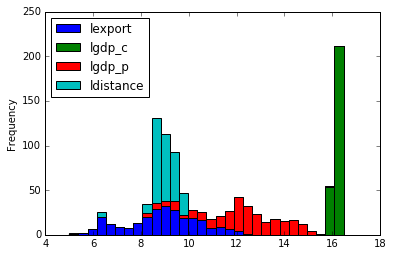

In [44]:
plt.figure();
df1.plot.hist(stacked=True, bins=30)

(265, 15)

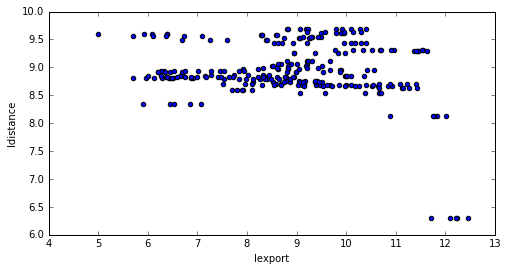

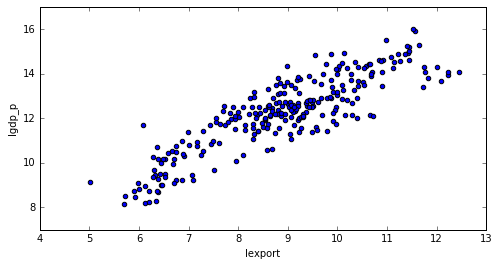

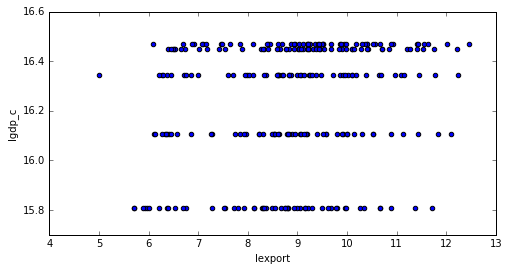

In [7]:
df.plot(kind='scatter', x='lexport', y='ldistance', figsize=(8, 4))
df.shape

df.plot(kind='scatter', x='lexport', y='lgdp_p', figsize=(8, 4))
df.shape

df.plot(kind='scatter', x='lexport', y='lgdp_c', figsize=(8, 4))
df.shape

#### Regression
The regression analysis is presented below Log GDP of the USA is denoted as x1, log GDP of the partner country as x2 and log of the distance between the two countries as x3.

In [8]:
X=np.column_stack((df.lgdp_c, df.lgdp_p, df.ldistance))
X=sm.add_constant(X)

In [13]:
model = smf.OLS(df.lexport, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lexport   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     294.7
Date:                Tue, 12 Apr 2016   Prob (F-statistic):           1.76e-83
Time:                        10:33:21   Log-Likelihood:                -296.66
No. Observations:                 265   AIC:                             601.3
Df Residuals:                     261   BIC:                             615.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.9344      3.095      0.302      0.7

### Robustness

Below we check for robustness to see if clustering standard errors by year changes our baseline results. This appears not to be the case.

In [12]:
model = smf.OLS(df.lexport, X)
results = model.fit(cov_type='cluster', cov_kwds={'groups':df.year})
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lexport   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     2120.
Date:                Tue, 12 Apr 2016   Prob (F-statistic):           7.41e-07
Time:                        10:32:51   Log-Likelihood:                -296.66
No. Observations:                 265   AIC:                             601.3
Df Residuals:                     261   BIC:                             615.6
Df Model:                           3                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.9344      1.394      0.670      0.5

### Conclusion

Our regression results show that the bilateral trade between the US and its partner countries is largely explained by the size of the GDP of the partner country. This implies that trade agreements like TIIP may not have a large impact on increasing trade between countries, since the gravity model explains most of this. The policy implication of our result is therefore that trade agreements should be heavily debated.